### Import libraries

In [11]:
from downcast import reduce
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [12]:
path=r'C:\Users\niels\Documents\Master Folder - Instacart Basket Analysis 09.10

### Import Data

In [13]:
#import data
df = pd.read_pickle(os.path.join(path,'df_ords_prods_cus_merged.pkl'))


In [14]:
# reduce the size of dataframe
df = reduce(df) 

In [15]:
df.info(memory_usage ="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                bool    
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   new_customer            bool    
 8   product_id              int32   
 9   add_to_cart_order       int16   
 10  reordered               bool    
 11  _merge                  category
 12  product_name            category
 13  aisle_id                int16   
 14  department_id           int8    
 15  prices                  float32 
 16  price_range_loc         category
 17  busiest_day             category
 18  busiest_days            category
 19  busiest_period_of_day   category
 20  max_order               int8    
 21  loyalt

In [16]:
#check the output
df.shape

(32404859, 35)

In [17]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,True,1,2,8,NaN,True,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,True,2,3,7,15.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,True,3,3,12,21.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,True,4,4,7,29.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,True,5,4,15,28.0,False,196,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 3. Follow instructions to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

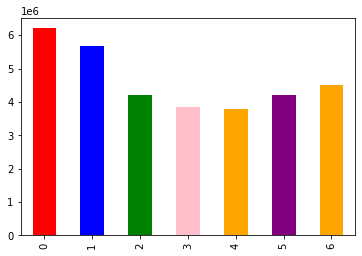

In [18]:
#Bar chart
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

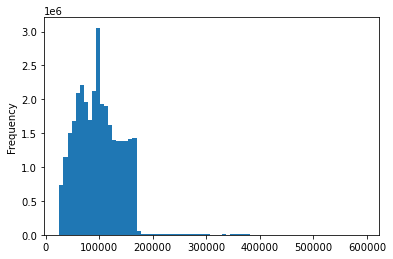

In [19]:
#Histogram
hist = df['income'].plot.hist(bins=75)

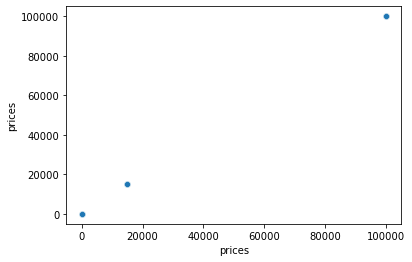

In [24]:
#Scatterplot
splot = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [25]:
# Define the sub set of the df for the line chart (plotting the top 1 million)
# Creating a random sampling
np.random.seed(4)

In [26]:
dev = np.random.rand(len(df)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
#Split the dataframe (70% of the sample in the dataframe)
big = df[dev]

In [29]:
#split the dataframe (30% of the sample in the dataframe)
small = df[~dev]

In [30]:
#checking the execution for accuraccy
len(df)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
# select the columns needed line plot
df_complete_data2 = small[['orders_day_of_week', 'prices']]

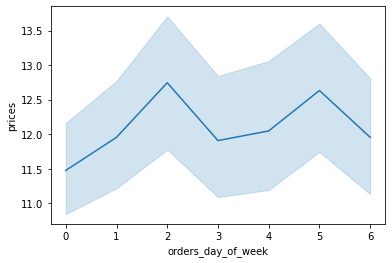

In [33]:
line = sns.lineplot(data = df_complete_data2, x = 'orders_day_of_week',y = 'prices')

### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [36]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                bool    
 3   order_number            int8    
 4   orders_day_of_week      int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float16 
 7   new_customer            bool    
 8   product_id              int32   
 9   add_to_cart_order       int16   
 10  reordered               bool    
 11  _merge                  category
 12  product_name            category
 13  aisle_id                int16   
 14  department_id           int8    
 15  prices                  float32 
 16  price_range_loc         category
 17  busiest_day             category
 18  busiest_days            category
 19  busiest_period_of_day   category
 20  max_order               int8    
 21  loyalt

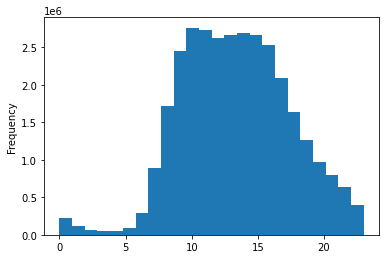

In [35]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

### #### The above histogram shows the number of  hours of the day (0 - 23 hour) and the total amount of orders placed for each hour (in millions)


In [38]:
#checking the histogram accuracy
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

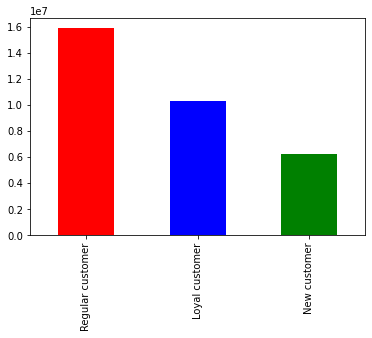

In [40]:
#plotting bar chart for the loyalty flag
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [42]:
#using the earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

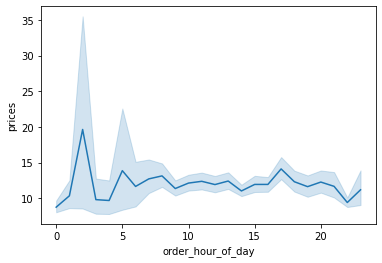

In [43]:
# Create line chart
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [44]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['no_of_dependents', 'age']]

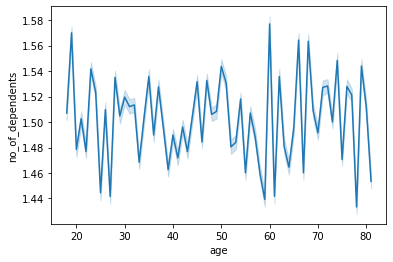

In [45]:
#create line chart
line3 = sns.lineplot(data = df_fam_status_age, x = 'age', y = 'no_of_dependents')

#### The line chart shows the relationship between customer's age and the number of dependents in each family. 

### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [48]:
#using the earlier splitted data of 30% and selecting the right columns
df_income_age = small [['income', 'age']]

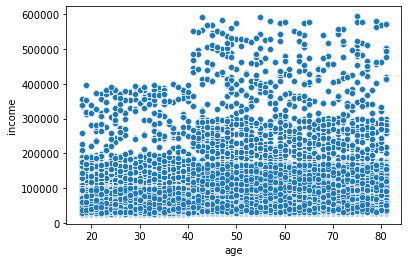

In [49]:
#create scatter plot
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

### The scatterplot showing the relationship between between age and income of instacart customers.  The key points noted from the scatter plot include:
##### 1. There are large concetration of customers across all ages that earns up to 200,000 pounds.
##### 2. Customers aged 40 years and older are earning more  (up to 600,000 USD).
##### In conclusion, instacart customers 40 years and above might spend more base on their higher income earnings.

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [50]:
bar.figure.savefig(os.path.join(path, 'bar_4_9.png'))

In [51]:
hist.figure.savefig(os.path.join(path, 'hist_4_9.png'))

In [52]:
splot.figure.savefig(os.path.join(path, 'splot_4_9.png'))

In [53]:
line.figure.savefig(os.path.join(path, 'line_4_9.png'))

In [54]:
hist_hour.figure.savefig(os.path.join(path,  'hist_hour_4_9.png'))

In [55]:
loyalty_bar.figure.savefig(os.path.join(path,  'loyalty_bar_4_9.png'))

In [56]:
line2.figure.savefig(os.path.join(path,  'line_prices_hour_4_9.png'))

In [57]:
line3.figure.savefig(os.path.join(path, 'line_age_deps_4_9.png'))

In [58]:
plot_spending.figure.savefig(os.path.join(path, 'scatter_spending_power_4_9.png'))